Привет, меня зовут Дмитрий Акимов и я буду проверять твой проект.
<br>Небольшая вступительная часть и начнем работу)
<br> Если не против, то предлагаю общаться на «ты». Если это не удобно - дай знать, и мы перейдем на "вы". Моя основная цель — не указать на совершенные ошибки, а поделиться своим опытом и помочь сделать твой проект лучше. Для этого я буду использовать разный стиль оформления комментариев. 
<div class="alert alert-block alert-success">
✔️ Все хорошо.
</div>

<div class="alert alert-warning">
⚠️ Критических замечаний нет, но есть возможность сделать твою работу лучше.
</div>

<div class="alert alert-block alert-danger">
❌ Если требуются исправления. Работа не может быть принята с красными комментариями.
</div>


Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом.
Будет очень хорошо, если ты будешь помечать свои действия следующим образом:
<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>
Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии. Всё это поможет выполнить повторную проверку твоего проекта оперативнее». 

<div class="alert alert-block alert-info">
<b>Добрый день, Дмитрий! </b>  
    
  Спасибо за ревью!  
    
  Мои ответы ниже.
</div>


# Определение возраста покупателей

**Описание проекта**




**Заказчик:** Сетевой супермаркет «Хлеб-Соль».  

Заказчик внедряет систему компьютерного зрения для обработки фотографий покупателей в прикассовой зоне, чтобы:  
 - анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы;
 - контролировать добросовестность кассиров при продаже алкоголя.


**Задача:** Создать модель для определения возраста покупателей.  


**Критерии заказчика:** значением метрики качества MAE не меньше 7. 



**Основные этапы исследования:**  

  1) Исследовательский анализ данных  
  2) Обучение модели  
  3) Анализ результата обучения модели  
  
  
**Описание данных:** 
 
В вашем распоряжении набор фотографий людей с указанием возраста.
Данные взяты с сайта ChaLearn Looking at People.  
Они находятся в папке /datasets/faces/. 
Папка со всеми изображениями (/final_files) и CSV-файл labels.csv с 
двумя колонками: file_name и real_age. 

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>

✔️ Отлично, описание проекта есть.
</div>

## Исследовательский анализ данных

In [1]:
import pandas as pd
import statistics as st
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.resnet import ResNet50
import matplotlib.pyplot as plt
from PIL import Image

### Размер и характеристики данных

In [2]:
# Файл с разметкой
labels = pd.read_csv('/datasets/faces/labels.csv')

In [3]:
# Место расположения фото
path = '/datasets/faces/final_files/'

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>

✔️ Данные загружены, молодец, что определяешь ссылку на фотографии отдельно.
</div>


In [4]:
# Информация о размеченных данных
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [5]:
# Несколько последних строк из выборки
labels.tail(5)

file_name  real_age
7586  007608.jpg        14
7587  007609.jpg        37
7588  007610.jpg        28
7589  007611.jpg        20
7590  007612.jpg        47

In [6]:
# Размер данных
labels.shape

(7591, 2)

Изображений 7591 шт.  
Так как данных много будем использовать загрузчик по батчам ImageDataGenerator.
Подбираем оптимальный размер фото для обучения, так как этом может повлиять на результаты обучения. 
Предположим в качестве размера фото для обучения брать размер изображения равный 50му перцентилю размера, вычисленноому по всей выборке фото.

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>

✔️ Хорошо, основная информация по таблице есть. </div>


In [7]:
# Списки размера фото по ширине и высоте
size_w = []
size_h = []
for i in labels[:]['file_name']:
    im = Image.open(path+i)
    size_w.append(im.size[0])
    size_h.append(im.size[1])

In [8]:
# Некоторые статистики размера изображений
h = round(np.percentile(size_h, 50), 0)
w = np.percentile(size_w, 50)
print(' По ширине:')
print(f'50 перцентиль: {w}')
print(f'максимальный размер: {np.max(size_w)}') 
print(f'минимальный размер: {np.min(size_w)}')

print('\n По высоте:')
print(f'50 перцентиль: {h}')
print(f'максимальный размер: {np.max(size_h)}')
print(f'минимальный размер: {np.min(size_h)}')

 По ширине:
50 перцентиль: 385.0
максимальный размер: 4466
минимальный размер: 47

 По высоте:
50 перцентиль: 384.0
максимальный размер: 4466
минимальный размер: 47


Размер фото разный, разброс размера большой.  
Размер 50го перцентиля в 384 пикселей подойдет для обучения.

In [9]:
# Загрузка данных
train_datagen = ImageDataGenerator(rescale=1./255)
train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path,
        x_col='file_name',
        y_col='real_age',
        target_size=(384, 384),
        batch_size=32,
        class_mode='raw',
        seed=12345)

Found 7591 validated image filenames.


In [10]:
# Пары фото - метка
features, target = next(train_gen_flow)

In [11]:
# Размер выборки
features.shape

(32, 384, 384, 3)

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>

✔️ ImageDataGenerator инициализирован верно.

</div>


Загрузчик работает корректно: фото выгружаются с учетом заданных настроек.

### График распределения возраста в выборке

In [12]:
# Сатистики возраста
display(labels['real_age'].describe())

count    7591.000000
mean       31.201159
std        17.145060
min         1.000000
25%        20.000000
50%        29.000000
75%        41.000000
max       100.000000
Name: real_age, dtype: float64

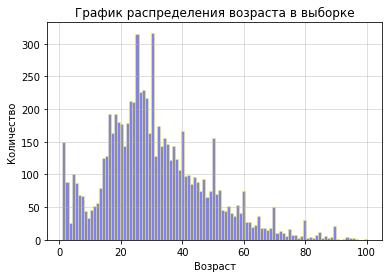

In [13]:
# график распределения возраста в выборке
plt.hist(labels['real_age'], bins=100, color='blue', edgecolor='yellow', alpha=0.5)
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.title('График распределения возраста в выборке')
plt.grid(alpha=0.5)
plt.show()

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>

✔️ Хороший график, можем наглядно оценить распределение.
</div>


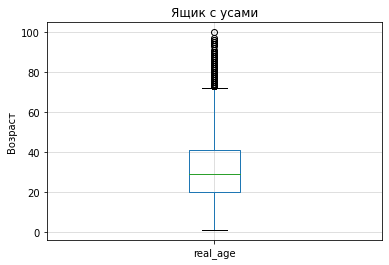

In [14]:
# Ящик с усами для возраста
labels["real_age"].plot(kind='box')
plt.ylabel('Возраст')
plt.title('Ящик с усами')
plt.grid(alpha=0.5)
plt.show()

Аномальных значений нет.  
Наиболее часто встречаемый возраст в выборке - люди от 20 до 30 лет.

### Вывод 15 произвольных фото

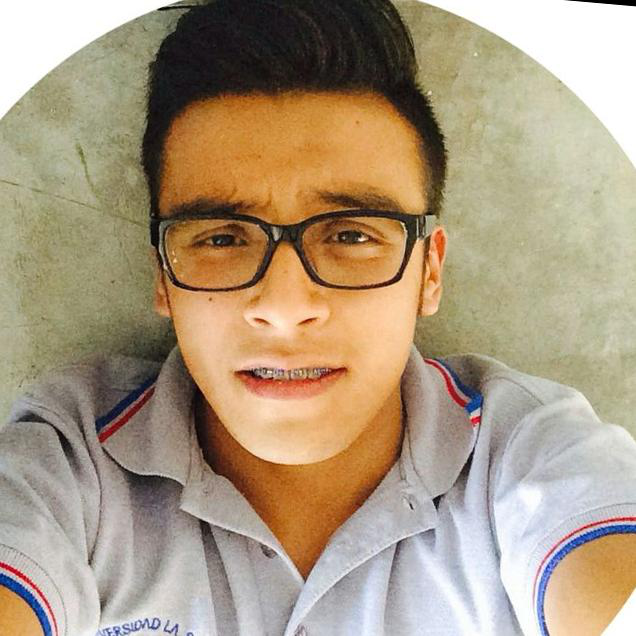

Размер фото 000010.jpg: (636, 636)


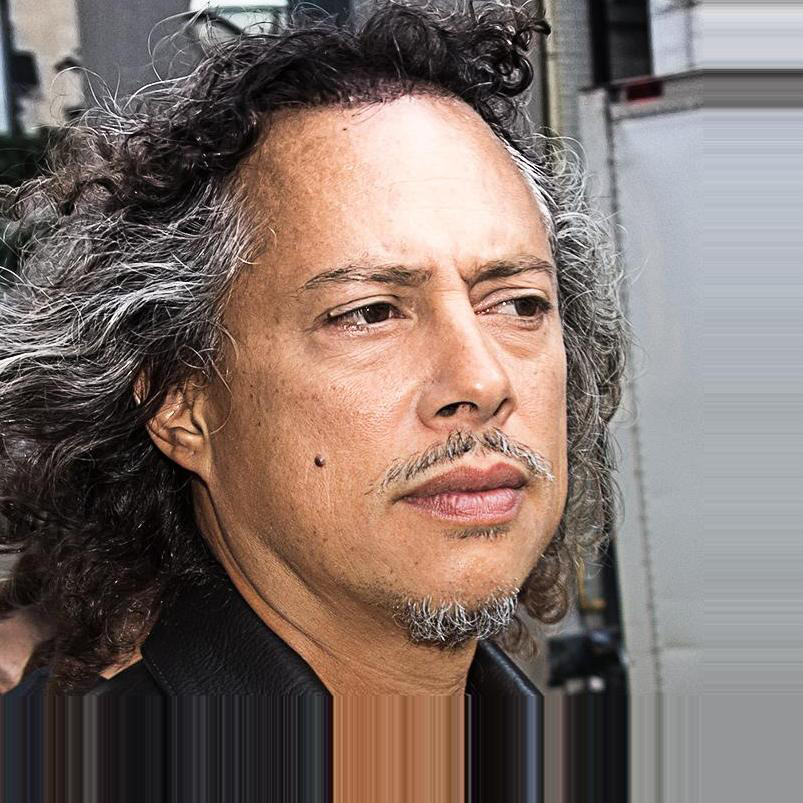

Размер фото 000011.jpg: (803, 803)


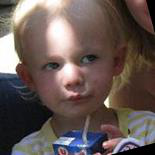

Размер фото 000012.jpg: (155, 155)


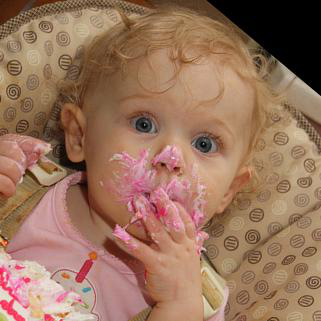

Размер фото 000013.jpg: (321, 321)


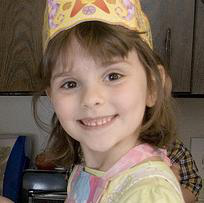

Размер фото 000014.jpg: (204, 203)


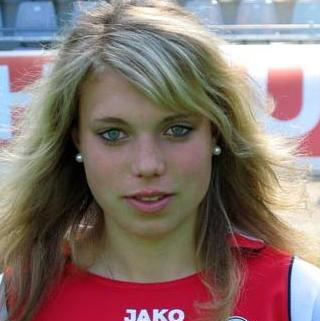

Размер фото 000015.jpg: (320, 321)


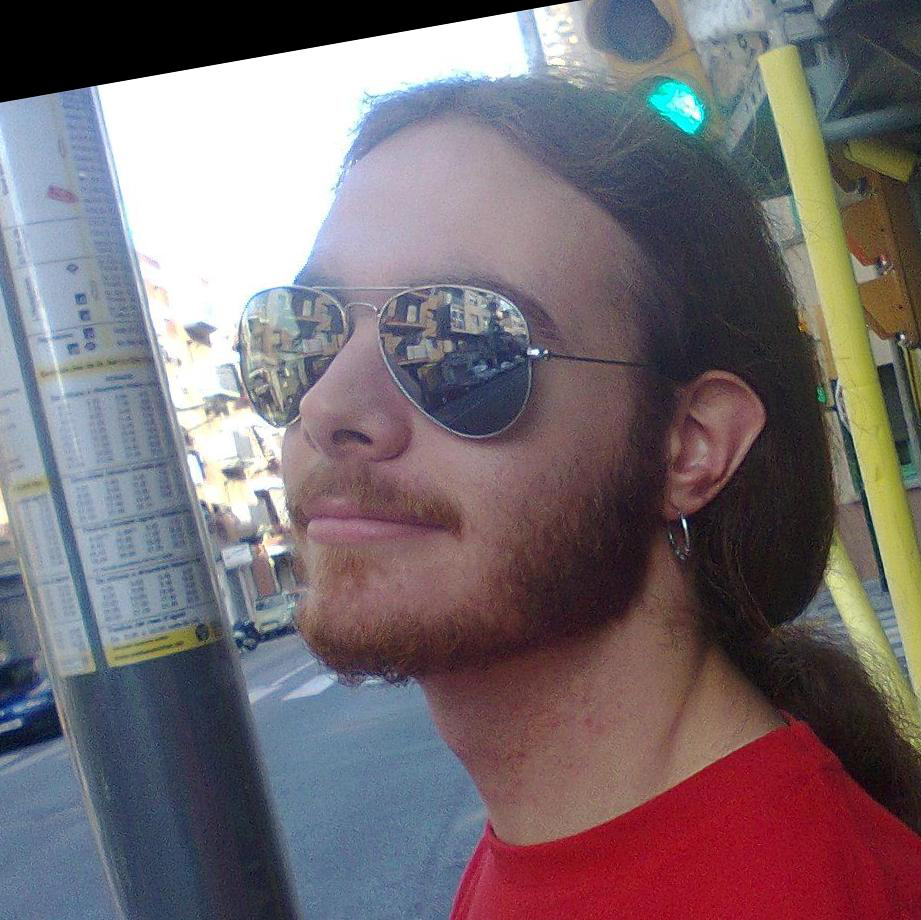

Размер фото 000016.jpg: (921, 920)


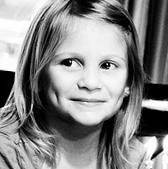

Размер фото 000017.jpg: (168, 169)


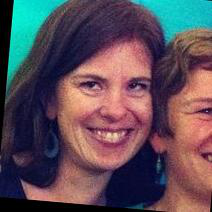

Размер фото 000018.jpg: (212, 212)


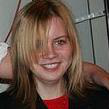

Размер фото 000019.jpg: (109, 109)


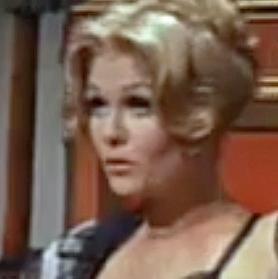

Размер фото 000020.jpg: (278, 279)


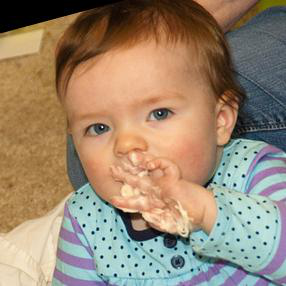

Размер фото 000021.jpg: (286, 286)


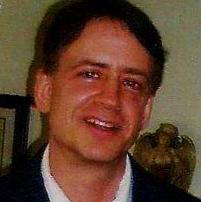

Размер фото 000022.jpg: (201, 202)


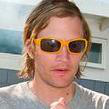

Размер фото 000023.jpg: (109, 109)


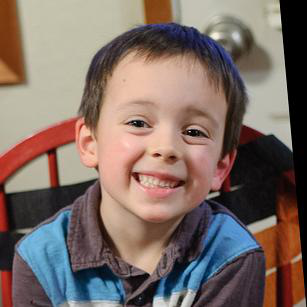

Размер фото 000024.jpg: (307, 307)


In [15]:
# Вывод 15 исходных произвольных фото 
for i in labels[10:25]['file_name']:
    im = Image.open(path+i)
    im.show()
    print(f'Размер фото {i}: {im.size}') 

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>

✔️ Отлично, можно заметить, что изначально выборка была неоднородная.
</div>


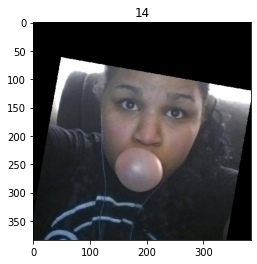

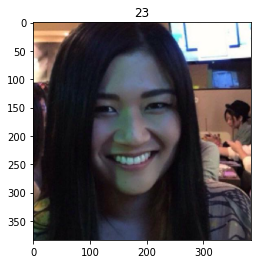

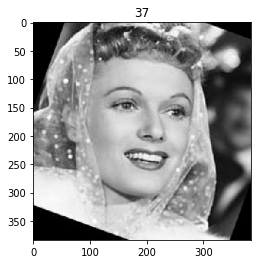

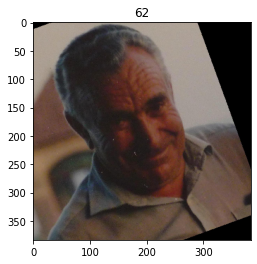

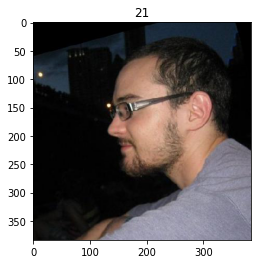

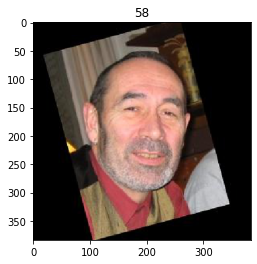

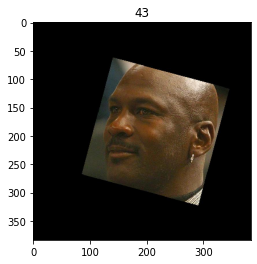

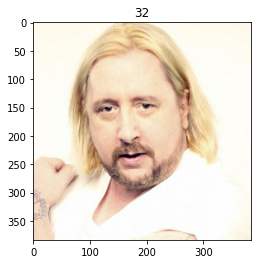

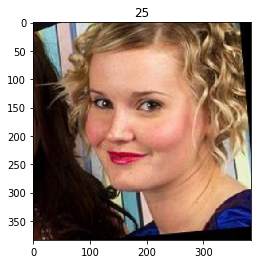

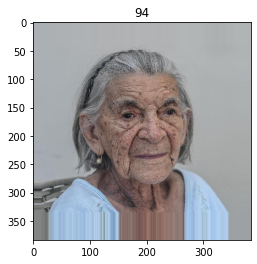

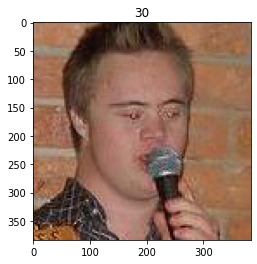

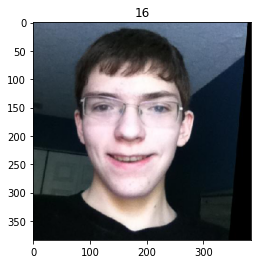

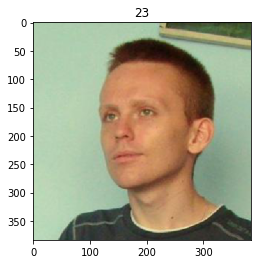

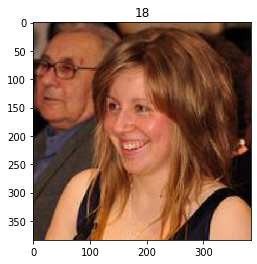

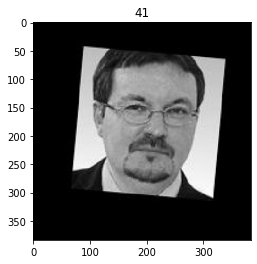

In [16]:
# Вывод 15 произвольных фото после загрузчика
for photo, age in zip(features[10:25], target[10:25]):
    plt.figure()
    plt.title(age)
    plt.imshow(photo)

Фото преобразованы к одному размеру.

Вывод:
    Проведен исследовательский анализ набора фотографий.

В представленных данных 7591 фото.
2 признака:
file_name - имя фото.
real_age - возраст человека на фото. Не на всех фото есть лицо человека. Люди разных возрастов и пола. Исходный размер фото разный. Присутствуют черно-белые и цветные фото и фото под наклоном. Большинство фото квадратные или близки к квадратным.
50й перцентиль размера изображений 384 пикселя.

Так как данных много для загрузки даных использовали загрузчик по батчам ImageDataGenerator с размером батча 32.

В качестве размера фото для обучения выбран размер изображения равный 50му перцентилю размера в 384 пикселя, вычисленному по всей выборке фото.

Характеристики изображения после загрузчика:
размер: 384х384, цветовых каналов: 3.

Наиболее частый возраст в выборке - от 20 до 30 лет.
Исследование данных помогает установить оптимальные настройки для более лучшего обучения модели и оценить качество данных: приемлемый размер и количество, цветность (исходное количество каналов) фото, выборок и батча batch_size.

Также улучшить модель поможет добавление аугментации в обучающую выборку, так как анализ данных показал, что в выборке есть фото с поворотами. Выявление часто встречаемого возраста также помогает понять, что люди от 20 до 30 лет будут лучше распознаваться моделью, чем люди других возрастов.

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
✔️ Хорошо, ты отметила основные моменты в данных, вывела примеры фотографий и изучила распределение таргета. Очень содержательный вывод, единственное, на что могу обратить твое внимание - это на распределение таргета, не кажется тебе странным, что на гистограмме присутствую всплески?
</div>


<div class="alert alert-block alert-info">
Скорее всего, это связано со сбором выборки. Чаще всего люди фотографируются на каких-либо значимых событиях: например, на юбилей. К тому же люди склонны округлять свой возраст до ближайшего круглого числа. Если сбор был частично опросом, то неважность для человека опроса могла бы привести к тому, что человек называл примерный возраст, округляя его ближайшим к 5ке или десятке. Либо сам вопрос звучал именно в контексте указать округленный. В силу того, в том числе, что не всегда сам человек помнил, сколько ему лет на фото точно, например на своих старых фото. Часть выборки, возможно, собиралась неправильно. (Здесь я учитываю то, что нам предоставили в качестве таргета именно реальный возраст, а не кажущийся).  
    
Напиши, пожалуйста, что я не учла, может я описание выборки не так поняла?

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v2</b>
    
✔️ Отличный вывод, согласен с тобой - каждое предположение вполне имеет право на жизнь.
</div>


## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

import pandas as pd
import statistics as st
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, Flatten, Dense, AveragePooling2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.resnet import ResNet50
import matplotlib.pyplot as plt
from PIL import Image

def load_train(path):
    labels = pd.read_csv(path + 'labels.csv')
    train_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255, vertical_flip=True, horizontal_flip=True)
    return train_datagen.flow_from_dataframe(
            dataframe=labels,
            directory=path+'final_files/',
            x_col='file_name',
            y_col='real_age',
            target_size=(384, 384),
            batch_size=32,
            class_mode='raw',
            subset='training',
            seed=12345)     


def load_test(path):
    labels = pd.read_csv(path + 'labels.csv')
    validation_datagen = ImageDataGenerator(validation_split=0.25, rescale=1./255)
    return validation_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path+'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(384, 384),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=12345)    


def create_model(input_shape):
    backbone = ResNet50(input_shape=input_shape,
                        weights='imagenet',
                        include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Flatten())
    model.add(Dense(units=124, activation='relu'))
    model.add(Dense(units=84, activation='relu'))
    model.add(Dense(units=1, activation='relu'))
    optimizer = Adam(lr=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
    model.summary()

    return model    


def train_model(model, train_data, test_data, batch_size=None, epochs=10,  # 10
                steps_per_epoch=None, validation_steps=None):
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size,
              epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2, shuffle=True)
    return model

```

```
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
_________________________________________________________________
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 124)               254076    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                10500     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 85        

Total params: 23,852,373
Trainable params: 23,799,253
Non-trainable params: 53,120
_________________________________________________________________
<class 'tensorflow.python.keras.engine.sequential.Sequential'>

Train for 178 steps, validate for 60 steps  
Epoch 1/10  
178/178 - 119s - loss: 274.2323 - mae: 12.1662 - val_loss: 452.7761 - val_mae: 16.1968  
Epoch 2/10  
178/178 - 114s - loss: 110.4172 - mae: 7.9540 - val_loss: 472.9197 - val_mae: 16.6354  
Epoch 3/10  
178/178 - 94s - loss: 81.1607 - mae: 6.8659 - val_loss: 224.6538 - val_mae: 11.6971  
Epoch 4/10  
178/178 - 95s - loss: 63.0568 - mae: 6.0674 - val_loss: 229.1577 - val_mae: 11.8111  
Epoch 5/10  
178/178 - 114s - loss: 51.9254 - mae: 5.5009 - val_loss: 94.3212 - val_mae: 7.1165  
Epoch 6/10  
178/178 - 77s - loss: 45.9780 - mae: 5.1868 - val_loss: 80.6837 - val_mae: 6.7957  
Epoch 7/10  
178/178 - 74s - loss: 38.2705 - mae: 4.7159 - val_loss: 83.3751 - val_mae: 6.9871  
Epoch 8/10  
178/178 - 113s - loss: 33.2690 - mae: 4.4301 - val_loss: 74.1041 - val_mae: 6.6307  
Epoch 9/10  
178/178 - 116s - loss: 28.9061 - mae: 4.0720 - val_loss: 89.5212 - val_mae: 7.0620  
Epoch 10/10  
178/178 - 112s - loss: 24.6006 - mae: 3.7926 - val_loss: 70.8270 - val_mae: 6.3391  

60/60 - 16s - loss: 70.8270 - mae: 6.3391  
Test MAE: 6.3391  


```

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера v1</b>
    
✔️ Отлично, модель построена и показывает требуемую точность. Молодец, что использовала Horizontal_flip - зеркальное отражение выглядит более естественным для наших данных, а вот  vertical_flip тут выглядит немного лишним, так как тяжело представить ситуацию, когда мы получим перевернутое лицо для определения возраста)
</div>

## Анализ обученной модели

Провели исследовательский анализ набора фотографий.  

Который позволил настроить параметры для обучения модели.  

Так как данных много 7591 фото, то для их загрузки использовали загрузчик по батчам ImageDataGenerator с размером батча 32, аугментацией с поворотами по вертикали и горизонтали.  
В качестве размера фото для обучения выбран размер изображения равный 50му перцентилю размера в 384 пикселя, вычисленноому по всей выборке фото.  

Задача определена как задача регресси с пороговым значением заказчика для качества модели по метрике MAE меньше 7.  

Найдена успешная модель: предобученная на 'imagenet' ResNet50 с окончанием тремя полносвязными слоями с 124, 84 и 1 нейронами и функцией активации relu, с оптимизатором adam с шагом обучения 0,0001, с функцией потерь Mean Squared Error.   

Найденная модель удовлетворяет заданным заказчиком требованиям: достигнуто качество модели MAE=6,3 на тестовых данных, что позволит предсказать возраст покуателя с ошибкой в +- 6 лет.

<div class="alert alert-block alert-success">
    <b>Комментарий от ревьюера v1</b>
    
# Общий вывод
    
✔️ Ты полностью справилась со всеми техническими сложностями и построила правильную модель, которая добилась требуемого качества. Неплохая финальная метрика, но как ты думаешь, с MAE = 6 может ли наша модель  решать поставленные задачи? 
    
Я готов принять проект, если будут вопросы, то задавай, если нет - то присылай назад и я приму его.
</div>


<div class="alert alert-block alert-info">
Думаю, что для задачи заказчика:  
    
анализировать покупки и предлагать товары, которые могут заинтересовать покупателей этой возрастной группы  
модель может справляться достаточно успешно для большинства товаров.  

А вот для задачи:  
контролировать добросовестность кассиров при продаже алкоголя  
потребуется боле точная модель.

<div class="alert alert-block alert-info">
Подскажи, пожалуйста.  
    
    1. Как сделать результаты более "стабильными": один и тот же код выдавал мае и выше 7 и 6,9 и 6,3.  
    Такой разброс не может же быть обусловлен только ресурсами для обучения? Что можно подкрутить в настройках модели?  
    
    2. Что-то интересное из ресурсов (классика+актуальное) по моделям для временных рядов.    

<div class="alert alert-block alert-success">
    <b>Комментарий от ревьюера v2</b>
    
# Общий вывод
    
✔️ Согласен с твоей оценкой предсказательной способности модели. 

1. Одним из способов стабилизировать МАЕ - это поэтапное уменьшение learning_rate и увеличение количества эпох, для этого может использоваться scheduler(https://keras.io/api/callbacks/learning_rate_scheduler/). Ещё можно проверить на каких фотографиях модель ошибается сильнее всего, нет ли ошибок в выборке и поработать над предобрбаоткой данных.
    
2. Если честно, то я особо не работал с временными рядами, поэтому, не могу подсказать что-либо конкретное по данной теме. Попробуй обратиться к совим наставникам или куратору, они помогут найти необходимый материал.
Но мне кажется, что перед тем как изучать нейронные сети для рядов, лучше сначала познакомиться с основой нейронных сетей(например тут:https://academy.yandex.ru/handbook/ml/article/nejronnye-seti), на степике есть очень хорошие курсы по основам DL.
    
Надеюсь, что смог помочь, успехов в дальнейшем обучении!)
</div>


## Чек-лист

- [x]  Jupyter Notebook открыт
- [x ]  Весь код выполняется без ошибок
- [x ]  Ячейки с кодом расположены в порядке исполнения
- [x ]  Исследовательский анализ данных выполнен
- [x ]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x ]  MAE модели не больше 8
- [x ]  Код обучения модели скопирован в финальную тетрадь
- [x ]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x ]  По итогам обучения модели сделаны выводы